In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
train = pd.read_excel('Stock_Market_data.xlsx')
print(train)

                     Date    Open    High     Low   Close    Volume
0     2015-01-04 16:00:00   40.60   40.76   40.31   40.72  36865322
1     2015-02-04 16:00:00   40.66   40.74   40.12   40.29  37487476
2     2015-06-04 16:00:00   40.34   41.78   40.18   41.55  39223692
3     2015-07-04 16:00:00   41.61   41.91   41.31   41.53  28809375
4     2015-08-04 16:00:00   41.48   41.69   41.04   41.42  24753438
...                   ...     ...     ...     ...     ...       ...
1506   3/25/2021 16:00:00  235.30  236.94  231.57  232.34  34061853
1507   3/26/2021 16:00:00  231.55  236.71  231.55  236.48  25479853
1508   3/29/2021 16:00:00  236.59  236.80  231.88  235.24  25227455
1509   3/30/2021 16:00:00  233.53  233.85  231.10  231.85  24792012
1510   3/31/2021 16:00:00  232.91  239.10  232.39  235.77  43623471

[1511 rows x 6 columns]


In [4]:

#splitting the data and checking for stationarity 

t1=train[0:755]
t2=train[755:]
print(t1.describe())
print(t2.describe())

             Open        High         Low       Close        Volume
count  755.000000  755.000000  755.000000  755.000000  7.550000e+02
mean    61.805563   62.307417   61.313510   61.838570  2.934653e+07
std     14.060818   14.135247   13.933412   14.023388  1.434453e+07
min     40.340000   40.740000   39.720000   40.290000  7.425603e+06
25%     51.295000   51.805000   50.745000   51.205000  2.071336e+07
50%     57.850000   58.060000   57.420000   57.820000  2.589647e+07
75%     70.615000   71.175000   69.950000   70.590000  3.356688e+07
max     97.000000   97.240000   96.040000   96.770000  1.350000e+08
             Open        High         Low       Close        Volume
count  756.000000  756.000000  756.000000  756.000000  7.560000e+02
mean   152.906098  154.506508  151.216058  152.945317  3.104993e+07
std     45.584754   46.181832   45.045448   45.617321  1.412138e+07
min     87.850000   90.050000   87.510000   88.520000  1.016120e+05
25%    110.022500  111.187500  108.790000  109.6

## train-> "OPEN"

<Axes: >

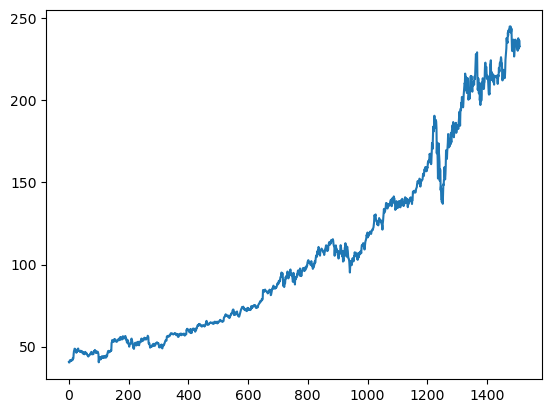

In [5]:
#step 1
#normal data
train['Open'].plot()

(array([422., 228., 180., 191., 135.,  74.,  58.,  48., 119.,  56.]),
 array([ 40.34 ,  60.809,  81.278, 101.747, 122.216, 142.685, 163.154,
        183.623, 204.092, 224.561, 245.03 ]),
 <BarContainer object of 10 artists>)

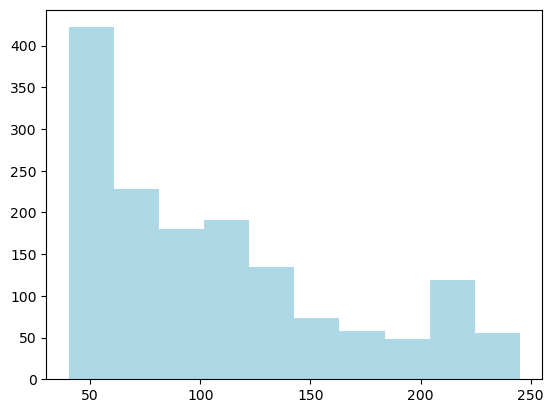

In [6]:
plt.hist(train['Open'], color='lightblue')

In [7]:
#AD fuller test
#train=train.dropna()
t = train["Open"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#If the p-value is less than or equal to 0.05, you reject H0 and conclude that the time series is stationary.
#If the p-value is greater than 0.05 , you fail to reject H0 and conclude that the time series is not stationary.

ADF Statistic: 0.823915
p-value: 0.992013


ADF Statistic: -0.310272
p-value: 0.924037


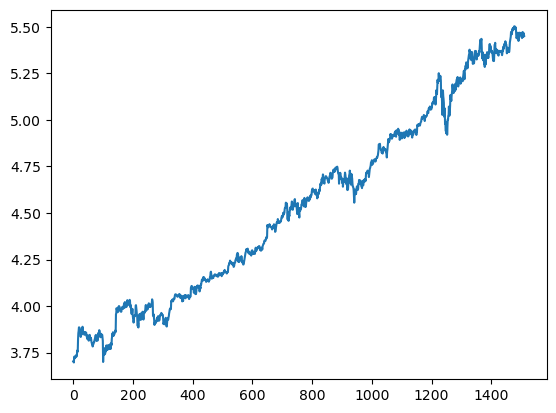

In [8]:
#step 2 log transform
x= np.log(train['Open'])
plt.plot(x)
result = adfuller(x)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


<Axes: >

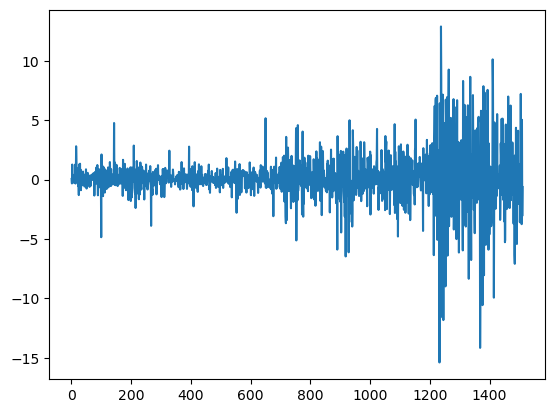

In [9]:
#1st order transformation

train['Open_diff']= train['Open']-train['Open'].shift(1)
train['Open_diff'].plot()

In [13]:
result = adfuller(train['Open_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.913565
p-value: 0.000000


ADF Statistic: -30.939979
p-value: 0.000000


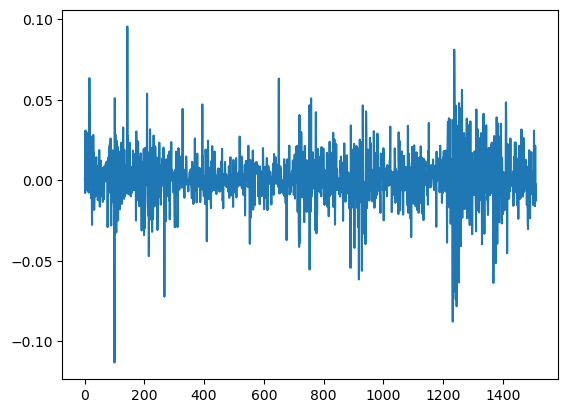

In [12]:
#Power Transformation
train['Open_log'] = np.log(train['Open'])
train['Open_log_diff'] = train['Open_log'] - train['Open_log'].shift(1)
train['Open_log_diff'].plot()
result = adfuller(train['Open_log_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

## train ->'High'

<Axes: >

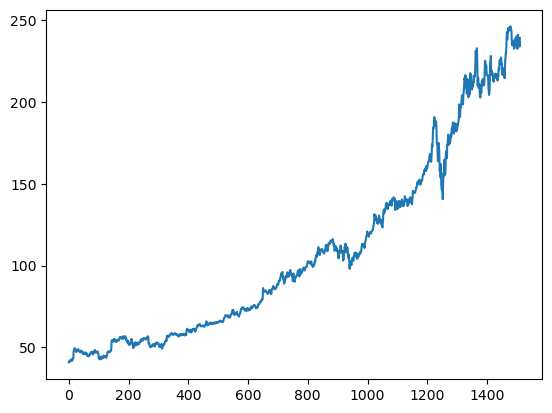

In [14]:
train['High'].plot()

(array([424., 226., 176., 193., 134.,  76.,  53.,  50., 118.,  61.]),
 array([ 40.74 ,  61.279,  81.818, 102.357, 122.896, 143.435, 163.974,
        184.513, 205.052, 225.591, 246.13 ]),
 <BarContainer object of 10 artists>)

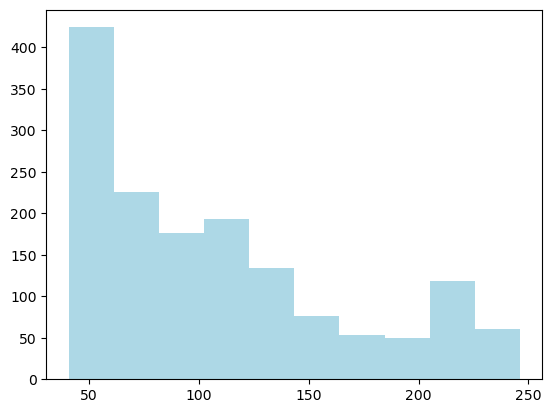

In [16]:
plt.hist(train['High'], color='lightblue')

In [18]:
#AD fuller test
#train=train.dropna()
t = train["High"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#If the p-value is less than or equal to 0.05, you reject H0 and conclude that the time series is stationary.
#If the p-value is greater than 0.05 , you fail to reject H0 and conclude that the time series is not stationary.

ADF Statistic: 1.570419
p-value: 0.997766


ADF Statistic: -0.088150
p-value: 0.950606


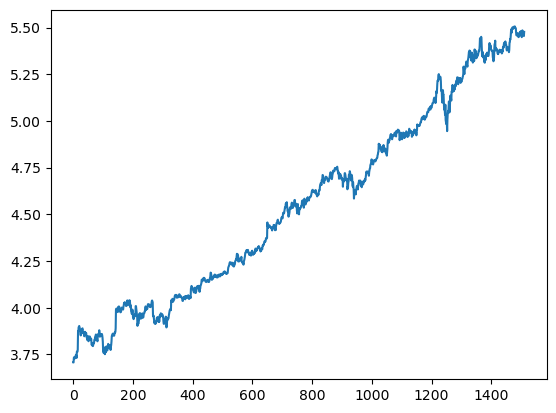

In [19]:
#step 2 log transform
x= np.log(train['High'])
plt.plot(x)
result = adfuller(x)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -9.976424
p-value: 0.000000


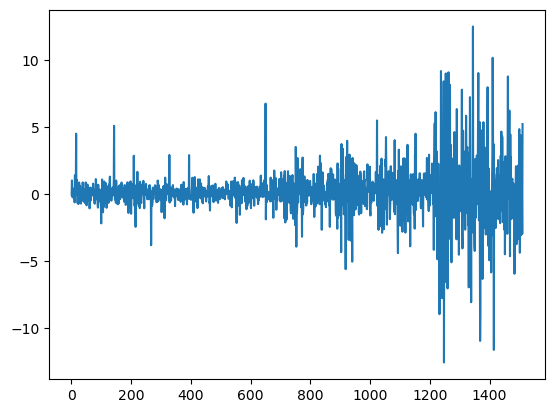

In [21]:
#1st order transformation

train['High_diff']= train['High']-train['High'].shift(1)
train['High_diff'].plot()
result = adfuller(train['High_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -17.335412
p-value: 0.000000


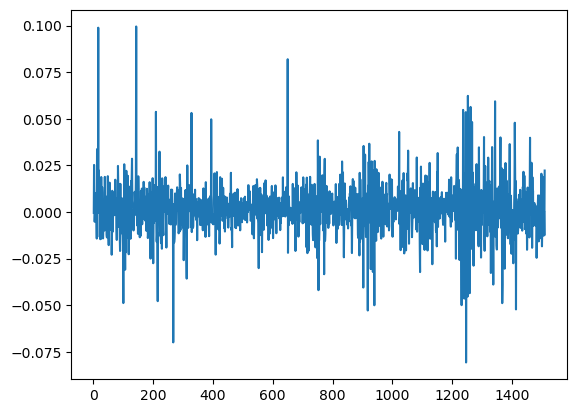

In [22]:
#Power Transformation
train['High_log'] = np.log(train['High'])
train['High_log_diff'] = train['High_log'] - train['High_log'].shift(1)
train['High_log_diff'].plot()
result = adfuller(train['High_log_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

## train -> "Low"

<Axes: >

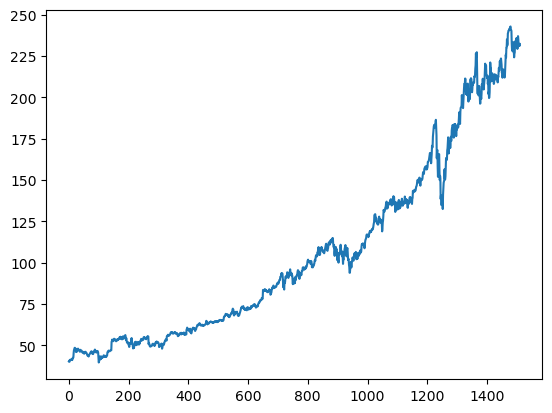

In [24]:
train['Low'].plot()

(array([415., 235., 178., 193., 140.,  69.,  56.,  57., 114.,  54.]),
 array([ 39.72,  60.04,  80.36, 100.68, 121.  , 141.32, 161.64, 181.96,
        202.28, 222.6 , 242.92]),
 <BarContainer object of 10 artists>)

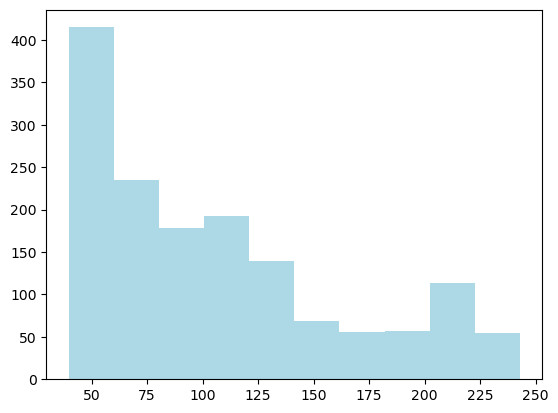

In [26]:
plt.hist(train['Low'], color='lightblue')

In [27]:
#AD fuller test
#train=train.dropna()
t = train["Low"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#If the p-value is less than or equal to 0.05, you reject H0 and conclude that the time series is stationary.
#If the p-value is greater than 0.05 , you fail to reject H0 and conclude that the time series is not stationary.

ADF Statistic: 1.224828
p-value: 0.996153


ADF Statistic: -0.151713
p-value: 0.944038


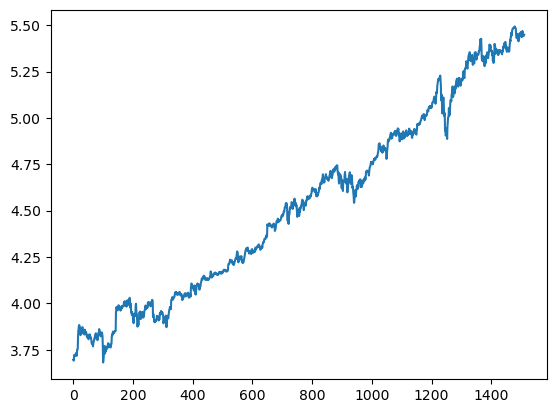

In [28]:
#step 2 log transform
x= np.log(train['Low'])
plt.plot(x)
result = adfuller(x)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -11.808717
p-value: 0.000000


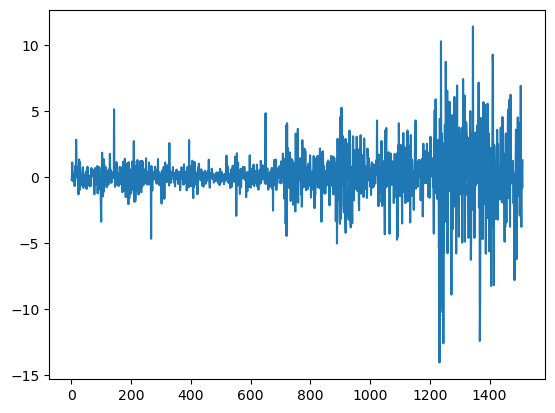

In [30]:
#1st order transformation

train['Low_diff']= train['Low']-train['Low'].shift(1)
train['Low_diff'].plot()
result = adfuller(train['Low_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])